# Predicting Student Performance with K-Nearest Neighbors Regression

This project explores the use of K-Nearest Neighbors (KNN) Regression to predict student performance based on various factors such as socioeconomic status, study hours, sleep hours, and attendance. By leveraging KNN, a simple and interpretable non-parametric method, we aim to model non-linear relationships in the data and provide meaningful predictions of students' grades.

## Preparing the Environment

### Install Libraries

In [ ]:
# !pip install -r requirements.txt

### Import Libraries

In [17]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Prepare Dataset

### Load Dataset

In [6]:
# Load the dataset
df = pd.read_csv('data.csv')

# Displaying the first few rows of the dataset
df.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0


### Partition Datasent into Features (X) and Target (y)

In [7]:
# Separating features (X) and target (y)
X = df.drop(columns=['Grades'])
y = df['Grades']

# Splitting the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

In [12]:
# Standardizing the data for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]

array([[-1.43776634, -0.56084363,  1.35953722, -0.98048335],
       [-1.09269535, -0.71632226,  0.33894844, -0.81000458],
       [-0.42212181, -0.87180089,  0.99504122,  0.04238932],
       [ 1.06117415, -0.71632226,  0.12025084, -0.21332885],
       [-0.46298195,  0.73481161,  0.41184764,  0.63906504]])

## Training the K-Nearest Neighbors Regression Model

### Train

In [24]:
# Initializing the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5, metric='manhattan', weights='distance')

# Training the model
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor(metric='manhattan', weights='distance')

### Evaluate

In [25]:
# Making predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluating the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Absolute Error: 1.5247578990718698
Mean Squared Error: 5.584519743800485
R² Score: 0.926013400077643


### Visualize Actual vs Predicted Values

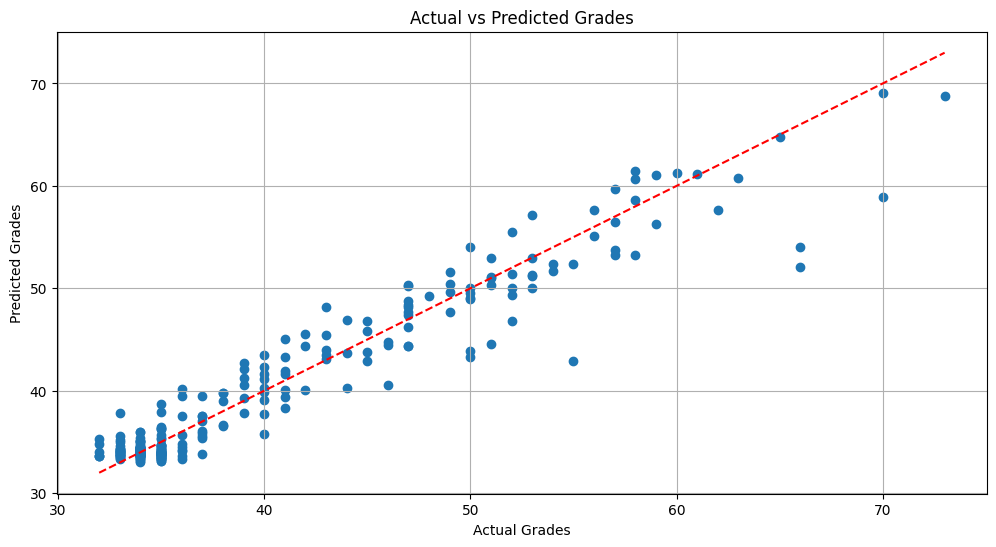

In [26]:
# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Grades')
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.grid(True)
plt.savefig('plot.png')
plt.show()

### Visualize the Residuals

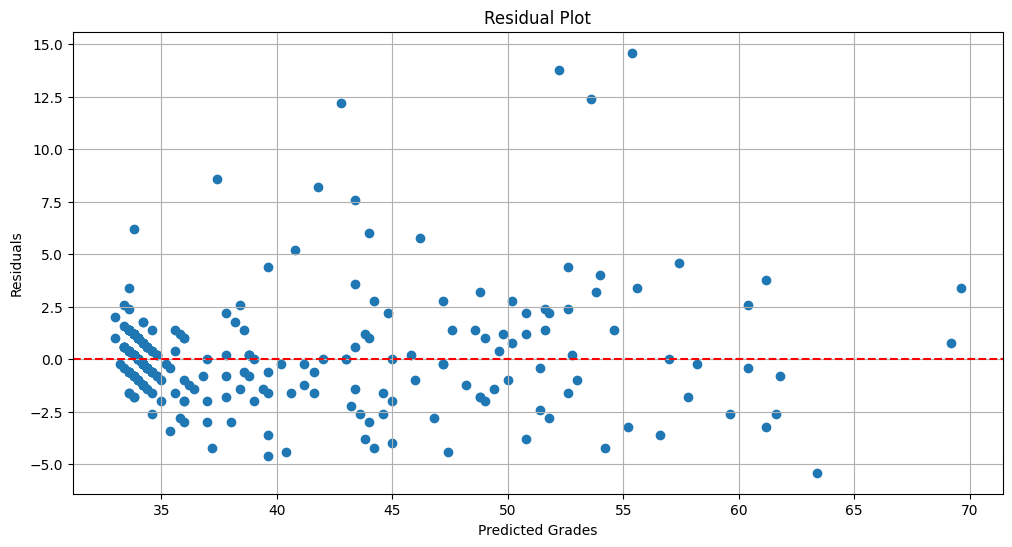

In [16]:
# Calculating residuals
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Grades')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()